In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams["axes.labelpad"]="20"

In [2]:
t = np.arange(1,11)
y = np.array([1355, 871, 551, 359, 204, 127, 84, 55, 33, 23])
N = 10

y_log = np.log(y)

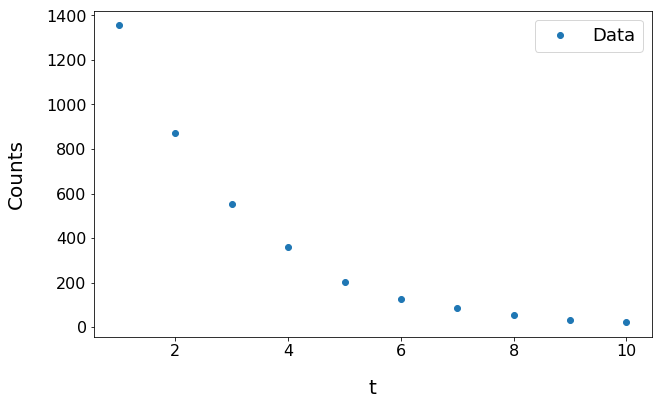

In [3]:
plt.figure(figsize=(10,6), dpi=100, facecolor="white")
plt.plot(t,y, ls="", marker="o", label="Data")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("t", fontsize=20)
plt.ylabel("Counts", fontsize=20)
plt.legend(loc="best", fontsize=18)

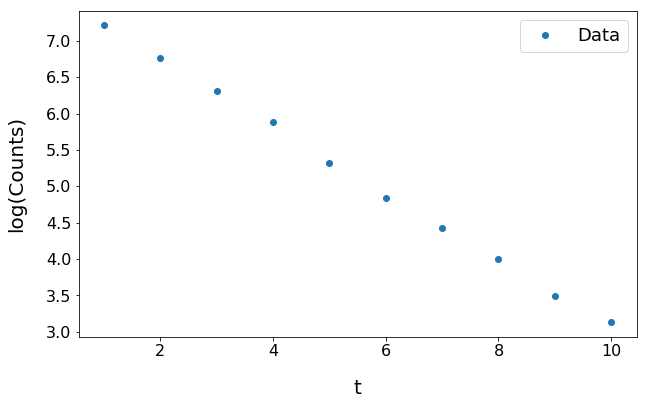

In [4]:
plt.figure(figsize=(10,6), dpi=100, facecolor="white")
plt.plot(t,y_log, ls="", marker="o", label="Data")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("t", fontsize=20)
plt.ylabel("log(Counts)", fontsize=20)
plt.legend(loc="best", fontsize=18)

In [5]:
# Define a function that calculates the mean of the inserted array
def m(x):
    return np.mean(x)

In [6]:
# Define a linear function
def lin(x, a, b):
    return a+b*x

## Unweighted straight line fit

### a)

In [7]:
# Calculate a and b using the formula derived in the lecture
a = ( m(t**2)*m(y_log) - m(t*y_log)*m(t) ) / ( m(t**2) - m(t)**2 )
b = ( m(t*y_log) - m(t)*m(y_log) ) / ( m(t**2) - m(t)**2 )

a, b

(7.6725368536277339, -0.4603027961217383)

### b)

In [8]:
# Define a function that calculates the uncertainty of the fit
def sigma_f(x, sigma):
    return ( sigma**2/N * ( (x-m(x))**2 / (m(x**2) - m(x)**2) + 1) )**0.5

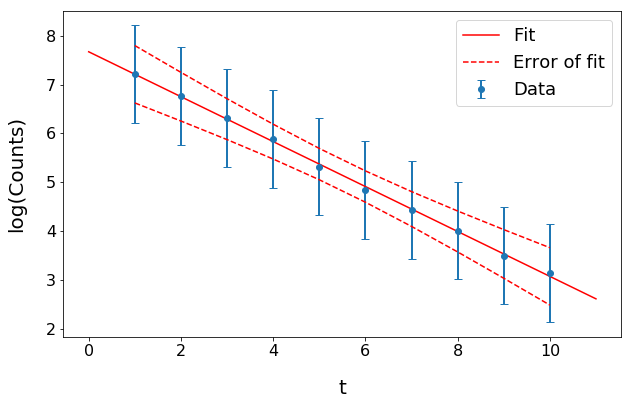

In [31]:
# Plot the data (blue) with an error of sigma=1 together with the fit (red line)
# and the fit-uncertainty (red dashed line)
sigma = 1

plt.figure(figsize=(10,6), dpi=100, facecolor="white")
x_fit = np.arange(0,11,0.001)
y_fit = lin(x_fit, a, b)
y_fit_t = lin(t, a, b)

plt.plot(x_fit, y_fit, ls="-", c="r", label="Fit")
plt.plot(t, y_fit_t+sigma_f(t, sigma), ls="--", c="r", label="Error of fit")
plt.plot(t, y_fit_t-sigma_f(t, sigma), ls="--", c="r")
plt.errorbar(t, y_log, yerr=sigma, ls="", marker="o", lw=2, capsize=4, label="Data")

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("t", fontsize=20)
plt.ylabel("log(Counts)", fontsize=20)
plt.legend(loc="best", fontsize=18)

### c)

In [10]:
# Calculate the error of the data (square-root) and the logarithmic values
# using Gaussian error-propagation
y_err = y**0.5
y_log_err = 1/y * y_err
y_log_err

array([ 0.02716629,  0.03388371,  0.04260143,  0.05277798,  0.070014  ,
        0.08873565,  0.10910895,  0.13483997,  0.17407766,  0.20851441])

## Weighted straight line fit

### d)

In [11]:
# Define a function that calculates the Gauss-bracket
def g(x):
    res = 0
    
    if type(x)==int:
        for i in np.arange(0,N):
            res += x/(y_log_err[i]**2)
    else:
        for i in np.arange(0,N):
            res += x[i]/(y_log_err[i]**2)
            
    return res

In [12]:
# Calculate a and b using the weighted formula
a_w = ( g(y_log)*g(t**2) - g(y_log*t)*g(t) ) / ( g(t**2)*g(1) - g(t)**2 )
b_w = ( g(y_log*t)*g(1) - g(y_log)*g(t) ) / ( g(t**2)*g(1) - g(t)**2 )

In [13]:
a_w, b_w

(7.6852242969402802, -0.46258468246310774)

### e)

In [14]:
# Define a function that calculates the uncertainty of the weighted fit
def sigma_weighted(x):
    return ( ( g(x**2) + x**2*g(1) - 2*x*g(x) ) / ( g(x**2)*g(1) - g(x)**2 ) ) ** 0.5

In [15]:
sigma_weighted(t)**2

array([ 0.00046924,  0.00030069,  0.0002853 ,  0.00042306,  0.00071399,
        0.00115806,  0.0017553 ,  0.00250569,  0.00340924,  0.00446595])

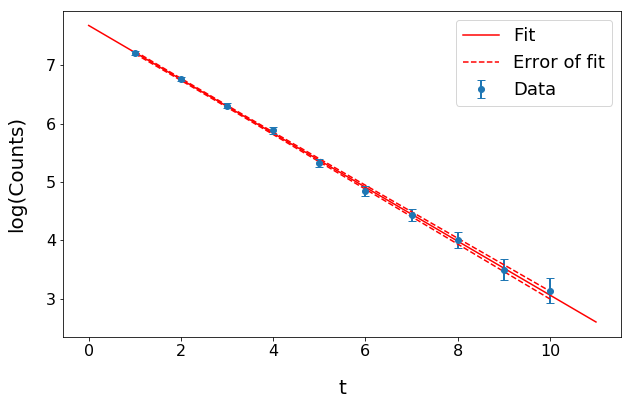

In [16]:
# Plot the data (blue) with the calculated error together with the fit (red line)
# and the fit-uncertainty (red dashed line)
plt.figure(figsize=(10,6), dpi=100, facecolor="white")
x_fit = np.arange(0,11,0.001)
y_fit_w = lin(x_fit, a_w, b_w)
y_fit_w_t = lin(t, a_w, b_w)

plt.plot(x_fit, y_fit_w, ls="-", c="r", label="Fit")
plt.plot(t, y_fit_w_t+sigma_weighted(t), ls="--", c="r", label="Error of fit")
plt.plot(t, y_fit_w_t-sigma_weighted(t), ls="--", c="r")
plt.errorbar(t, y_log, yerr=y_log_err, ls="", marker="o", lw=2, capsize=4, label="Data")

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("t", fontsize=20)
plt.ylabel("log(Counts)", fontsize=20)
plt.legend(loc="best", fontsize=18)

### f)

### Shift by average t

In [34]:
# Shift the data by the average of the t values
t_new = t - 5.5

In [18]:
# Calculate a and b using the shifted values
a_new = ( g(y_log)*g(t_new**2) - g(y_log*t_new)*g(t_new) ) / ( g(t_new**2)*g(1) - g(t_new)**2 )
b_new = ( g(y_log*t_new)*g(1) - g(y_log)*g(t_new) ) / ( g(t_new**2)*g(1) - g(t_new)**2 )

a_new, b_new

(5.1410085433931858, -0.46258468246310841)

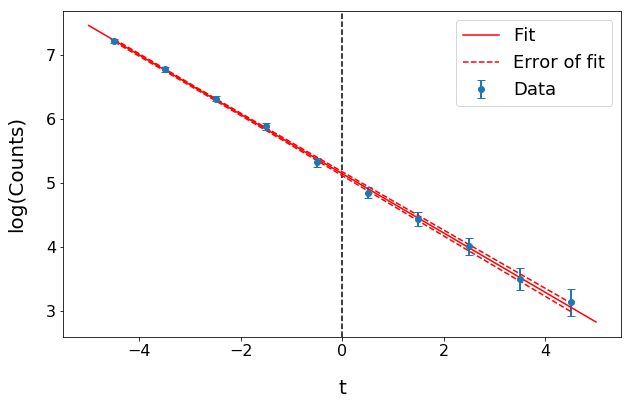

In [19]:
# Plot the data (blue) with the calculated error together with the fit (red line)
# and the fit-uncertainty (red dashed line)
plt.figure(figsize=(10,6), dpi=100, facecolor="white")
x_fit_new = np.arange(-5,5,0.001)
y_fit_new = lin(x_fit_new, a_new, b_new)
y_fit_new_t = lin(t_new, a_new, b_new)

plt.axvline(x=0, ymin=0, ymax=1, ls="--", c="k")
plt.plot(x_fit_new, y_fit_new, ls="-", c="r", label="Fit")
plt.plot(t_new, y_fit_new_t+sigma_weighted(t_new), ls="--", c="r", label="Error of fit")
plt.plot(t_new, y_fit_new_t-sigma_weighted(t_new), ls="--", c="r")
plt.errorbar(t_new, y_log, yerr=y_log_err, ls="", marker="o", lw=2, capsize=4, label="Data")

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("t", fontsize=20)
plt.ylabel("log(Counts)", fontsize=20)
plt.legend(loc="best", fontsize=18)

### Shift by weighted average t

In [20]:
# Shift the data by the weighted average of the t values
t_center = t-g(t)/g(1)

In [21]:
# Calculate a and b using the shifted values
a_center = ( g(y_log)*g(t_center**2) - g(y_log*t_center)*g(t_center) ) / ( g(t_center**2)*g(1) - g(t_center)**2 )
b_center = ( g(y_log*t_center)*g(1) - g(y_log)*g(t_center) ) / ( g(t_center**2)*g(1) - g(t_center)**2 )

a_center, b_center

(6.4822767461220998, -0.46258468246310858)

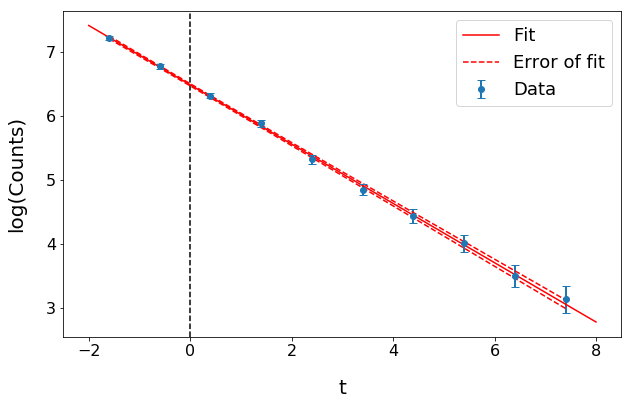

In [22]:
# Plot the data (blue) with the calculated error together with the fit (red line)
# and the fit-uncertainty (red dashed line)
plt.figure(figsize=(10,6), dpi=100, facecolor="white")
x_fit_center = np.arange(-2,8,0.001)
y_fit_center = lin(x_fit_center, a_center, b_center)
y_fit_center_t = lin(t_center, a_center, b_center)

plt.axvline(x=0, ymin=0, ymax=1, ls="--", c="k")
plt.plot(x_fit_center, y_fit_center, ls="-", c="r", label="Fit")
plt.plot(t_center, y_fit_center_t+sigma_weighted(t_center), ls="--", c="r", label="Error of fit")
plt.plot(t_center, y_fit_center_t-sigma_weighted(t_center), ls="--", c="r")
plt.errorbar(t_center, y_log, yerr=y_log_err, ls="", marker="o", lw=2, capsize=4, label="Data")

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("t", fontsize=20)
plt.ylabel("log(Counts)", fontsize=20)
plt.legend(loc="best", fontsize=18)

In [23]:
sigma_weighted(t_center)

array([ 0.02166185,  0.01734036,  0.01689074,  0.0205685 ,  0.02672051,
        0.03403035,  0.04189631,  0.0500569 ,  0.05838872,  0.06682776])

In [24]:
sigma_weighted(t)

array([ 0.02166185,  0.01734036,  0.01689074,  0.0205685 ,  0.02672051,
        0.03403035,  0.04189631,  0.0500569 ,  0.05838872,  0.06682776])

In [25]:
# Covariance of a and b without shifting the data-set
cov = - g(t) / (g(t**2)*g(1) - g(t)**2)
cov

-0.00019914138132600892

In [26]:
# Covariance of a and b after shifting the data by the weighted average t
cov_center = - g(t_center) / (g(t_center**2)*g(1) - g(t_center)**2)
cov_center

2.377376236739308e-21

### Conclusion

In [ ]:
# Shifting the data-set by the average t so that it is symmetric around t'=0 does not
# change the fit-parameters or the uncertainty of the fit. 
# Neither does shifting the data-set by the weighted average t, which results in a vanishing
# covariance of a and b. 
# The effect is not visable since the covariance is already really small (-0.0002) in the beginning.